<table width=100%>
<tr>
    <td><h1 style="text-align: left; font-size:300%;">
        Introduction to Classification
    </h1></td>
    <td width="30%">
    <div style="text-align: right">
    <b> Practical Data Science Lessons</b><br><br>
    <b> Riccardo Bertoglio</b><br>
    <a href="mailto:riccardo.bertoglio@polimi.it">riccardo.bertoglio@polimi.it</a><br>
    </div>
</tr>
</table>

## Learning outcomes 🔎


*   What is Classification?
*   What is Logistic Regression?
*   Linear Regression for Classification
*   Simple Logistic Regression
*   Multinomial Logistic Regression
*   Model Evaluation
*   Visualize Predictions and Decision Boundaries
*   Polynomial Logistic Regression
*   Regularization

#### Resources:
* **Theory:**
    *   *[An Introduction to Statistical Learning](https://www.statlearning.com/)*
* **Practice:**
    *   *[scikit-learn User Guide](https://scikit-learn.org/stable/user_guide.html)*
    *   *[Harvard 2021 CS109-A: Introduction to Data Science](https://harvard-iacs.github.io/2021-CS109A/)*

## What is Classification?

Classification is the task of predicting a _qualitative_ response for the samples. It contrasts with regression, which predicts a _quantitative_ response. Instead of directly predicting the sample class, some methods produce a probability that the sample belongs to each class as the basis for the classification. In this notebook, you will learn to do classification through logistic regression (both with single and multiple features) and k-nearest neighbors.

## What is Logistic Regression?

Logistic Regression is a statistical method and a popular machine learning algorithm used for classification tasks. In its simplest form, it is used to model the probability of a binary outcome, which can take one of two values, typically represented as 0 and 1. Logistic Regression is particularly well-suited for problems where the dependent variable is categorical, such as yes/no, true/false, or pass/fail. It can also be adapted for multi-class classification.

### Why to use Logistic Regression?

As for Linear Regression, there are some advantages of using Logistic Regression over other ML techniques:
- Simplicity: Logistic regression models are mathematically less complex than other ML methods. Therefore, you can implement them even if no one on your team has in-depth ML expertise.
- Speed: Logistic regression models can process large volumes of data at high speed because they require less computational capacity, such as memory and processing power. 
- Interpretability: Logistic regression models are easier to inspect, debug, interpret, and communicate than other ML methods

### What are the applications of Logistic Regression?

Logistic regression has several real-world applications in many different industries. [Here are some examples](https://aws.amazon.com/what-is/logistic-regression/):
- Manufacturing: Manufacturing companies use logistic regression analysis to estimate the probability of part failure in machinery. They then plan maintenance schedules based on this estimate to minimize future failures.
- Healthcare: Medical researchers plan preventive care and treatment by predicting the likelihood of disease in patients. They use logistic regression models to compare the impact of family history or genes on diseases. 
- Finance: Financial companies have to analyze financial transactions for fraud and assess loan applications and insurance applications for risk. These problems are suitable for a logistic regression model because they have discrete outcomes, like high risk or low risk and fraudulent or not fraudulent.  
- Marketing: Online advertising tools use the logistic regression model to predict if users will click on an advertisement. As a result, marketers can analyze user responses to different words and images and create high-performing advertisements with which customers will engage.
- **Agriculture**: Logistic Regression models can be trained to classify plants as healthy or diseased, or they can be used to assess soil quality and classify soil types based on soil composition.

Importing the packages:

In [2]:
# Data and Stats packages
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.linear_model import LogisticRegression

# Visualization packages
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

## Import and explore data

For this tutorial we will be using Fisher's famous "Iris" dataset

In [3]:
dataset = datasets.load_iris()
print(dataset.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


#### What are our the target and features? 

In [4]:
print(dataset.target_names)
print(dataset.feature_names)

# Uncomment if you want to see much, much more info on this dataset
# print(dataset['DESCR'])

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


<img src="fig/iris_yong_cui_towarddatascience.png" width="400">

<img src="fig/fischer.jpg" width="150px" style="float:right; margin: 30px">




**As we can see, the response variable (y) is the flower type, it has 3 classes:**

- setosa
- versicolor 
- virginica

These are three different species of Iris flowers.

**The 4 predictor variables are flower characteristics (x):**

- sepal length (cm)
- sepal width (cm)
- petal length (cm)
- petal width (cm)


Although this is a toy dataset, in real datasets it will be important to understand the underlying features. Below is a comparison of the three species and their sepals/petals, as well as the overall flower.

<img src="fig/Aa_irises_at_gauntlet.jpg" width="150px" style="float:right; margin: 30px">

![Iris features](fig/iris_yong_cui_towarddatascience.png "Image src: https://towardsdatascience.com/the-iris-dataset-a-little-bit-of-history-and-biology-fb4812f5a7b5")


In [5]:
# Create the design matrix (the features)
X = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
print(X.shape)
display(X.head())
display(X.describe())

(150, 4)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
# Create the response variable
y = pd.DataFrame(data=dataset.target, columns=['species'])
print(y.shape)

(150, 1)


In [7]:
display(y.head())
display(y.describe())

,species
0,0
1,0
2,0
3,0
4,0


,species
count,150.000000
mean,1.000000
std,0.819232
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,2.000000


### Explore Data 

Check which variables have high correlations and distinctive patterns with the response. 

Any patterns worth mentioning?

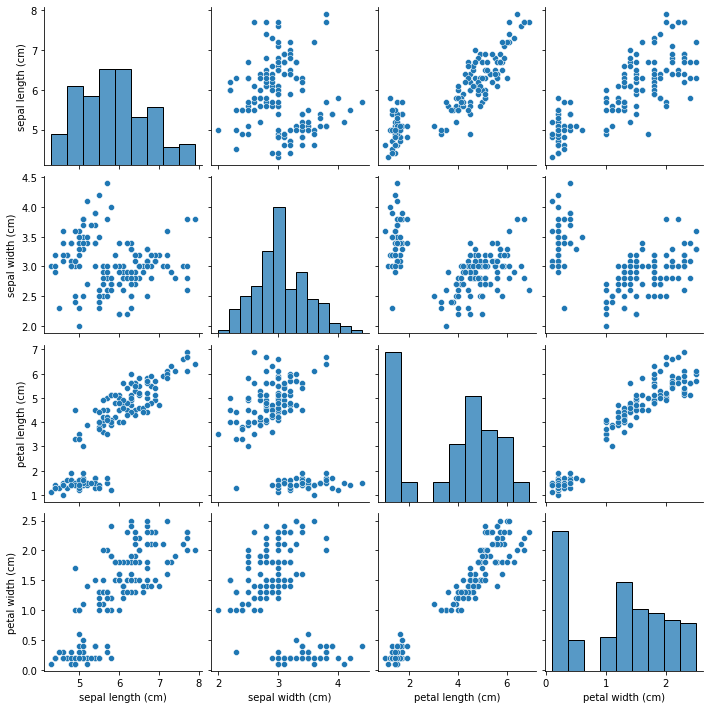

In [8]:
sns.pairplot(X)
plt.show()

**Are the features sepal/petal length and width uniformally distributed or do you observe some clusters of data points?**

What do you expect? Let's add color according to our response variable with `hue='species'`.

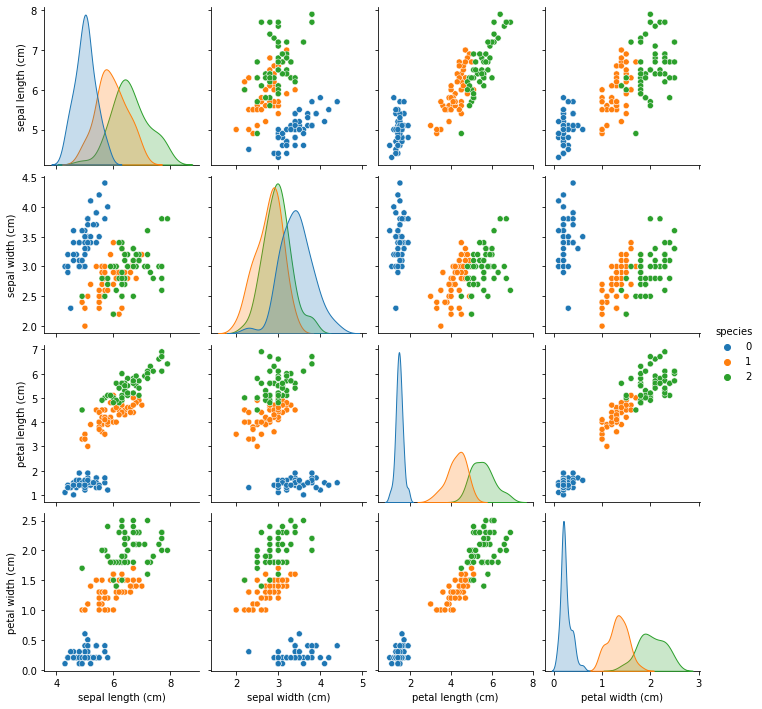

In [9]:
full_df = pd.concat([X,y], axis=1)
sns.pairplot(full_df, hue='species', palette = sns.color_palette("tab10")[:3])
plt.show()

Some features like 'petal length' and 'petal width' do have very high correlations and distinctive patterns with the response variable 'flower species'. When we would use these features for predicting the flower species, the classification wouldn't be very difficult. Certain ranges of **'petal length' and 'petal width' are very much correlated with a specific flower species and they are almost seperating our classes perfectly**.

**Just for illustration purposes we will continue to use only `'sepal width (cm)'` and `'sepal length (cm)'`. We are making the problem harder for ourselves by only using 'weaker' or less-discriminative features.**

In [10]:
X = X[['sepal width (cm)', 'sepal length (cm)']]

### Train-Test Split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [12]:
print('X_train.shape', X_train.shape)
print('y_train.shape', y_train.shape)

print('X_test.shape', X_test.shape)
print('y_test.shape', y_test.shape)

X_train.shape (100, 2)
y_train.shape (100, 1)
X_test.shape (50, 2)
y_test.shape (50, 1)


## Linear Regression for Classification

In [13]:
model_linear_sklearn = LinearRegression()

# Training
model_linear_sklearn.fit(X_train, y_train)

# Predict
y_pred_train = model_linear_sklearn.predict(X_train)
y_pred_test = model_linear_sklearn.predict(X_test)

# Perfromance Evaluation
train_score = accuracy_score(y_train, y_pred_train)*100
test_score = accuracy_score(y_test, y_pred_test)*100

print("Training Set Accuracy:",str(train_score)+'%')
print("Testing Set Accuracy:",str(test_score)+'%')

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

<div class='exercise-r'>  
 
**QUESTION: Can anyone explain why we are getting an error? What is wrong with `y_train` and `y_pred_train`?**

</div>

In [14]:
print(y_train[:5], y_train.dtypes)

     species
96         1
105        2
66         1
0          0
122        2 species    int32
dtype: object


In [15]:
y_pred_train[:5]

array([[1.01761878],
       [2.33100162],
       [0.88117842],
       [0.19897661],
       [2.53139119]])

**The fact that our linear regression is outputting continuous predictions is one of the major drawbacks of linear regression for classification. We can solve this in two manners:**

- Simply rounding our prediction by using `np.round()` and converting it to an int data type with `.astype(int)`


- Or, use a modified algorithm that has bounded outputs (more about Logistic Regression later)

In [16]:
np.round(y_pred_train[:5])

array([[1.],
       [2.],
       [1.],
       [0.],
       [3.]])

In [17]:
np.round(y_pred_train[:5]).astype(int)

array([[1],
       [2],
       [1],
       [0],
       [3]])

In [18]:
model_linear_sklearn = LinearRegression()

#Training
model_linear_sklearn.fit(X_train, y_train)

#Predict
y_pred_train = np.round(model_linear_sklearn.predict(X_train)).astype(int)
y_pred_test = np.round(model_linear_sklearn.predict(X_test)).astype(int)

#Perfromance Evaluation
train_score = accuracy_score(y_train, y_pred_train)*100
test_score = accuracy_score(y_test, y_pred_test)*100

print("Training Set Accuracy:",str(train_score)+'%')
print("Testing Set Accuracy:",str(test_score)+'%')

Training Set Accuracy: 73.0%
Testing Set Accuracy: 80.0%


### Get Performance by Class (Confusion Matrix)

- Each row of the matrix represents the instances in an actual class
- Each column represents the instances in a predicted class (or vice versa)
- The name stems from the fact that it makes it easy to see if the system is confusing two classes (i.e. commonly mislabeling one as another).

In [19]:
confusion_matrix_linear = pd.crosstab(
    y_test.values.flatten(), 
    y_pred_test.flatten(), 
    rownames=['Actual Class'], 
    colnames=['Predicted Class'],
)
display(confusion_matrix_linear)

Predicted Class,0,1,2,3
Actual Class,,,,
0,19,0,0,0
1,0,10,5,0
2,0,4,11,1


<div class='exercise-r'>  
    
**QUESTION: How many classes do we have in our y_test and in our y_pred_test? Why do we have 4 different predicted classes?**
    
</div>

**Can we use Linear Regression for classification?**

**Assumptions of Linear Regression:**
1. Linearity: Our dependent variable Y is a linear combination of the explanatory variables X (and the error terms)
2. Observations are independent of one another (i.e. no correlation of the error terms)
3. Constant variance of the error terms (i.e. homoscedasticity)
4. **The error terms are normally distributed ~ $N(0,\sigma^2)$**

**Suppose we have a binary outcome variable. Can we use Linear Regression?** 

Then we will have the following problems:
1. The error terms are heteroskedastic
2. $\epsilon$ is not normally distributed because Y takes on only two values
3. The predicted probabilities can be greater than 1 or less than 0

**Datasets where linear regression is problematic:** 
1. Binary response data where there are only two outcomes (yes/no, 0/1, etc.)
2. Categorical or ordinal data of any type, where the outcome is one of a number of discrete (possibly ordered) classes
3. Count data in which the outcome is restricted to non-negative integers
4. Continuous data in which the noise is not normally distributed

**This is where Generalized Linear Models (GLMs), of which logistic regression is a specific type, come to the rescue!**

Logistic regression is most useful for predicting binary or multi-class responses.
 
![Linear versus Logistic](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1534281070/linear_vs_logistic_regression_edxw03.png)

## Simple Logistic Regression
The logistic regression formula: 

$$\hat{p}= \dfrac{e^{w^T x}}{1+e^{w^T x}}$$

This is equivalent to: 

$$\hat{p}= \dfrac{1}{1+e^{-w^T x}}$$

<br>

<center>
<img src="https://miro.medium.com/max/3000/1*RqXFpiNGwdiKBWyLJc_E7g.png" alt="Sigmoid Function" style="width: 600px;"/>
</center>

To estimate the logistic regression coefficients we use the maximum likelihood method. In the case of binary simple logistic regression $w=[\beta_0, \beta_1]$, and the likelihood function we aim to maximize is defined as:
$$L(\beta_0, \beta_1) = \prod_{i=1}^{n} [p(x_i; \beta_0, \beta_1)]^{y_i}[1-p(x_i; \beta_0, \beta_1)]^{1-y_i}$$
where:
   - $\beta_0$ and $\beta_1$ are the parameters we want to estimate
   - $n$ is the total number of observations in the dataset
   - $y_i$ is the observed outcome for observation $i$
   - $x_i$ is the value of the independent variable for observation $i$
   - $p(x_i; \beta_0, \beta_1)$ is the probability of the dependent variable given $x_i$ and the parameters $\beta_0$ and $\beta_1$

## Multinomial Logistic Regression

When the response **$Y$ has more than 2 categories** we use an extension to the standard (binary) logistic regression, called Multinomial Logistic Regression (that is **different from the Multiple Logistic regression** which implies **multiple predictors**).

Through Scikit-learn we can fit a single single multinomial model or build multiple models in a One-vs-Rest fashion.

### Single Multinomial Logistic Regression Model

Suppose we have $K$ possible outcomes (classes). For each observation $i$, let $y_{i1}, y_{i2}, ..., y_{iK}$ be indicator variables that take the value 1 if observation $i$ belongs to class $j$, and 0 otherwise. Also, let $x_{i1}, x_{i2}, ..., x_{ip}$ be the $p$ predictor variables for observation $i$.

The softmax function is used to model the probabilities of belonging to each class $j$:

$$P(y_{ij} = 1|x_i) = exp(\beta_{j0} + \beta_{j1}x_{i1} + ... + \beta_{jp}x_{ip}) / \sum_{k=1}^{K}exp(\beta_{k0} + \beta_{k1}x_{i1} + ... + \beta_{kp}x_{ip})$$

where:
- $exp$ is the exponential function
- $P(y_{ij} = 1|x_i)$ is the probability of observation $i$ belonging to class $j$ given the values of the predictor variables $x_i$ and the parameters $beta_{j0}, beta_{j1}, ..., beta_{jp}$
- $\beta_{j0}, \beta_{j1}, ..., \beta_{jp}$ are the coefficients (parameters) for class $j$ and predictor variables $1$ through $p$
- The denominator $\sum_{k=1}^{K}exp(\beta_{k0} + \beta_{k1}x_{i1} + ... + \beta_{kp}x_{ip})$ represents the sum of the exponential terms for all $K$ classes, which normalizes the probabilities to add up to 1

Note that the multinomial logistic regression model with softmax coding is used to model and predict categorical outcomes with more than two categories. **The softmax function ensures that the probabilities of belonging to each class sum up to 1**, and the maximum probability among all classes is used to predict the class label for a given observation.

### Multinomial Logistic Regression as Multiple One-vs-Rest Models

It involves **splitting the multi-class problem into multiple binary classification problems**. A binary classifier is then trained on each binary classification problem and predictions are made using the model that is the most confident.

For example, given a multi-class classification problem with examples for each class ‘red,’ ‘blue,’ and ‘green‘. This could be divided into three binary classification datasets as follows:

    Binary Classification Problem 1: red vs [blue, green]
    Binary Classification Problem 2: blue vs [red, green]
    Binary Classification Problem 3: green vs [red, blue]

A possible downside of this approach is that it requires one model to be created for each class. For example, three classes require three models.

<img src="fig/multiple.png" width="1000">

Look in the Scikit-learn documentation for more details: https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

### Comparison of a multinomial logistic regression model against a linear regression model

In [20]:
# Training
model_logistic = LogisticRegression(C=100, multi_class = "ovr").fit(X_train, y_train.to_numpy().ravel())

# Predict
y_pred_train = model_logistic.predict(X_train)
y_pred_test = model_logistic.predict(X_test)

# Perfromance Evaluation
train_score = accuracy_score(y_train, y_pred_train)*100
test_score = accuracy_score(y_test, y_pred_test)*100

print("Training Set Accuracy:",str(train_score)+'%')
print("Testing Set Accuracy:",str(test_score)+'%')

Training Set Accuracy: 80.0%
Testing Set Accuracy: 82.0%


In [21]:
confusion_matrix_linear = pd.crosstab(
    y_test.values.flatten(), 
    y_pred_test.flatten(), 
    rownames=['Actual Class'], 
    colnames=['Predicted Class'],
)
display(confusion_matrix_linear)

Predicted Class,0,1,2
Actual Class,,,
0,19,0,0
1,0,8,7
2,0,2,14


In [22]:
model_logistic.predict(X_test)

array([1, 0, 2, 1, 2, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 2, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 1, 2, 0, 0, 0, 1, 2, 2, 0,
       0, 1, 2, 2, 2, 2])

You can use the `predict_proba()` function to return probability estimates for each of your observations

In [23]:
predicted_probabilities = model_logistic.predict_proba(X_test)
predicted_probabilities

array([[5.96919244e-06, 5.27365309e-01, 4.72628722e-01],
       [8.42110821e-01, 2.02933693e-02, 1.37595810e-01],
       [4.14360042e-15, 4.11875544e-01, 5.88124456e-01],
       [6.40936271e-05, 5.18158750e-01, 4.81777157e-01],
       [1.30968420e-09, 3.78413418e-01, 6.21586581e-01],
       [8.31432226e-01, 8.17950584e-02, 8.67727156e-02],
       [8.57160555e-03, 6.80299239e-01, 3.11129155e-01],
       [1.09401583e-08, 2.30524121e-01, 7.69475868e-01],
       [2.47940200e-09, 6.18450042e-01, 3.81549955e-01],
       [7.34727848e-05, 6.74519007e-01, 3.25407521e-01],
       [4.05904177e-06, 2.23409538e-01, 7.76586403e-01],
       [7.64689791e-01, 2.14627643e-01, 2.06825665e-02],
       [8.33860718e-01, 6.00422157e-02, 1.06097066e-01],
       [8.01112088e-01, 1.72435569e-01, 2.64523435e-02],
       [9.42388454e-01, 2.01908175e-02, 3.74207288e-02],
       [1.46098260e-04, 2.08513014e-01, 7.91340888e-01],
       [4.37722643e-07, 3.25836402e-01, 6.74163160e-01],
       [8.49755815e-05, 7.85325

The predicted class of an observation is the one with the highest probability

In [24]:
predicted_probabilities.argmax(axis = 1)

array([1, 0, 2, 1, 2, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 2, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 1, 2, 0, 0, 0, 1, 2, 2, 0,
       0, 1, 2, 2, 2, 2], dtype=int64)

**To compare the models we hold one of our 2 predictors constant so we can easily visualize and compare our prediction curves.**

- We fix `X_train['sepal width (cm)']` to its mean value. 

  - `x_1 = X_train['sepal width (cm)']`

  - `x_1_range  = np.ones_like(x_2_range)*x_1.mean()`
    

- We vary `X_train['sepal length (cm)']` from its minimum to its maximum and look how the predicted class evolves.
  
  - `x_2 = X_train['sepal length (cm)']`
  
  - `x_2_min, x_2_max = x_2.min(), x_2.max()+0.3`
  
  - `x_2_range  = np.arange(x_2_min, x_2_max, 0.003)`

In [25]:
def vary_x2(X_train):
    # Making our input features (x_2 varying, x_1 constant = mean of x_1)
    x_1 = X_train['sepal width (cm)']
    x_2 = X_train['sepal length (cm)']
    
    # get min and max values cushioned by some value so that points don't lie on boundary of plot
    x_2_min, x_2_max = x_2.min()-0.1, x_2.max()+0.3
    
    # make x2 vary
    x_2_range  = np.arange(x_2_min, x_2_max, 0.003)
    
    # set every value in x1 to be ones, then broadcast multipy by the mean of x1
    x_1_range  = np.ones_like(x_2_range)*x_1.mean()

    # construct our input features
    X_with_varying_x_2 = pd.DataFrame({'sepal width (cm)':  x_1_range,
                                      'sepal length (cm)' : x_2_range}
        
    )
    return x_2_range, X_with_varying_x_2
vary_x2(X_train)[1]

,sepal width (cm),sepal length (cm)
0,3.011,4.200
1,3.011,4.203
2,3.011,4.206
3,3.011,4.209
4,3.011,4.212
...,...,...
1262,3.011,7.986
1263,3.011,7.989
1264,3.011,7.992
1265,3.011,7.995


In [26]:
def comparison_plot(X_train, y_train, X_test,  y_test, label_shift = None, plot_confusion_matrix = False):
    """
    args:
    label_shift : int
        changes the labels by label_shift
    plot_confusion_matrix: bool
        if true plots confusion matrix
    """
    
    def change_labels(y, label_shift):
        return (y + label_shift) % 3
    
    if label_shift is not None:
        y_train = change_labels(y_train, label_shift)
        y_test = change_labels(y_test, label_shift)
        
    #fit our linear regression model
    model_linear_sklearn = LinearRegression().fit(X_train, y_train)
    
    #fit our logistic regression model
    model_logistic = LogisticRegression(C=100).fit(X_train, y_train)
    
    #get varying data
    x_2_range, X_with_varying_x_2 = vary_x2(X_train)

    # Make linear Predictions
    prediction_linear = model_linear_sklearn.predict(X_with_varying_x_2)

    # Make logistic Predictions
    prediction_proba = model_logistic.predict_proba(X_with_varying_x_2)
    prediction_thresholded = model_logistic.predict(X_with_varying_x_2)

    f, axes = plt.subplots(1,2, figsize=(14,6))

    # Plot Linear Predictions
    axes[0].plot(
        x_2_range, prediction_linear,
        'k--',
        label= 'Linear Output (raw = continuous)'
    )
    axes[0].plot(
        x_2_range, np.round(prediction_linear),
        'k-',
        alpha=1,
        label= 'Linear Predicted Class (rounded = integer)',
    )
    axes[0].plot(
        x_2_range, np.round(prediction_thresholded),
        'r-',
        alpha=0.5,
        label= 'Logistic Predicted Class (as shown on right)',
    )
    axes[0].legend()
    axes[0].set_title(
        'LINEAR Regression:\nRaw output and rounded output',
        fontsize=14,
    )
    axes[0].set_yticks([0, 1, 2, 3])
    axes[0].set_ylabel('Predicted Class', fontsize=12)

    # Plot Logistic Predictions
    for i in sorted(set(prediction_thresholded)):
        axes[1].plot(
            x_2_range, prediction_proba[:,i],
            linewidth=2,
            label= '$\hat{{P}}\:(Y={})$'.format(i)
        )
        axes[1].fill_between(
            x_2_range[prediction_thresholded==i], 1, 0,
            alpha=0.2,
            edgecolor='gray',
        )
    axes[1].legend()
    axes[1].set_title(
        "LOGISTIC Regression: predicted probability\nper class and the predicted class",
        fontsize=14,
    )
    axes[1].set_ylabel('Predicted Probability', fontsize=12)

    for ax in axes.flat:
        ax.tick_params(labelsize=12)
        ax.set_xlabel('sepal length (cm)', fontsize=12)
        ax.legend(fontsize=11, framealpha=1, edgecolor='k')

    plt.tight_layout()
    plt.show()
    
    y_pred_test_logistic = model_logistic.predict(X_test)

    # Logistic performance evaluation
    test_score_logistic = accuracy_score(y_test, y_pred_test_logistic)*100
    print("Logistic Testing Set Accuracy:",str(test_score)+'%')
    
    # Linear performance evaluation
    y_pred_test_linear = np.round(model_linear_sklearn.predict(X_test)).astype(int)
    linear_test_score = accuracy_score(y_test, y_pred_test_linear)*100
    print("Linear Testing Set Accuracy:",str(linear_test_score)+'%')
    
    if plot_confusion_matrix == True:
        confusion_matrix_linear = pd.crosstab(
            y_test.values.flatten(), 
            y_pred_test_linear.flatten(), 
            
            rownames=['Actual Class'], 
            colnames=['Predicted Class'],
        )
        confusion_matrix_logistic = pd.crosstab(
            y_test.values.flatten(), 
            y_pred_test_logistic.flatten(), 
            rownames=['Actual Class'], 
            colnames=['Predicted Class'],
        )
        print('======================================')
        print('Confusion Matrix Linear Regression:')
        display(confusion_matrix_linear)

        print('\n======================================')
        print('Confusion Matrix Logistic Regression:')
        display(confusion_matrix_logistic)
        print('======================================')

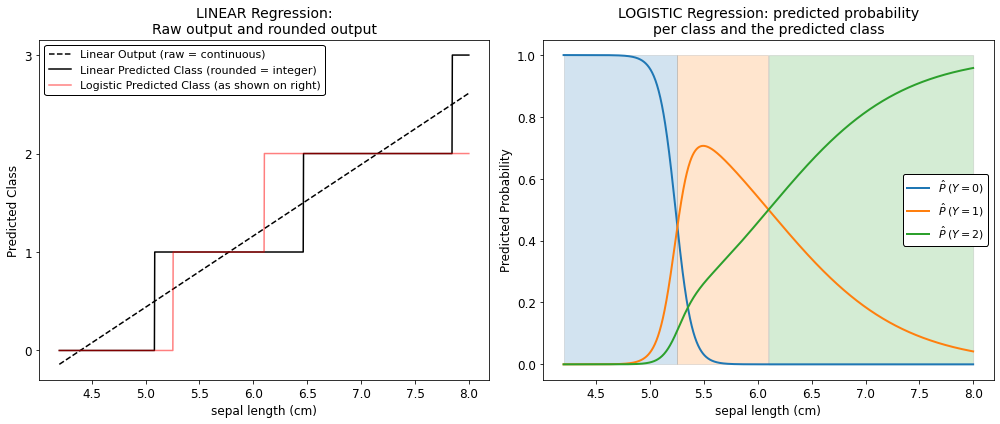

Logistic Testing Set Accuracy: 82.0%
Linear Testing Set Accuracy: 80.0%


In [27]:
comparison_plot(X_train, y_train.to_numpy().ravel(), X_test, y_test, label_shift = 0)

#### How does our Logistic Regression come up with mutiple class predictions?


- Each class $y_i$ has a sigmoid function that tries to predict the probability of the tested input belonging to that specific class $y_i$.
  - In our case when we have 3 classes, thus we have 3 sigmoid functions (the blue, orange and green line in the right figure).


- ```LogisticRegression().predict_proba(...)``` : returns probability estimates $P(y_i|x)$ for each $y_i$. In our case ```.predict_proba(...)``` returns 3 values (one for each class). In the figure we observe that : 
  - we have a **high probability of predicting Class 0** in regions with **low 'sepal length' values (left)**.
  - we have a **high probability of predicting Class 1** in regions with **medium 'sepal length' regions (middle)**.
  - have a **high probability of predicting Class 2** in regions with **high 'sepal length' regions (right)**.
  
  
- ```LogisticRegression().predict(...)```: returns 1 value: the predicted class label. The class with the highest probability given by ```.predict_proba(...)``` is exactly the predicted class output of ```.predict(...)```
  - In the figure our final prediction is the **red line**.

## Model Evaluation

In the context of classification problems, various evaluation metrics are used to assess the performance of machine learning models. Here, we'll see the most common evaluation metrics for binary classification problems. However, they can be **generalized to the multi-class setting in a one-vs-rest fashion and aggregation functions**. 

### Confusion Matrix:

A **confusion matrix** is a table that summarizes the performance of a classification model. The confusion matrix contains four important terms:

- **True Positives (TP)**: The number of correct positive predictions (correctly classified as positive).
- **True Negatives (TN)**: The number of correct negative predictions (correctly classified as negative).
- **False Positives (FP)**: The number of incorrect positive predictions (incorrectly classified as positive, also known as a Type I error).
- **False Negatives (FN)**: The number of incorrect negative predictions (incorrectly classified as negative, also known as a Type II error).

### Accuracy:

**Accuracy** measures the proportion of correct predictions among the total number of cases examined. It is calculated as:

$$ \text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN} $$

Accuracy is a straightforward metric but can be misleading in the presence of class imbalance, where one class significantly outnumbers the other.

### Precision:

**Precision** (also known as Positive Predictive Value) is the fraction of relevant instances among the retrieved instances. It is calculated as:

$$ \text{Precision} = \frac{TP}{TP + FP} $$


### Recall (Sensitivity):

**Recall** (also known as Sensitivity or True Positive Rate) is the fraction of relevant instances that were retrieved. It is calculated as:

$$ \text{Recall} = \frac{TP}{TP + FN} $$

**[When is precision more important over recall?](https://datascience.stackexchange.com/a/30882/154035)**
- For **rare cancer data modeling**, anything that doesn't account for false-negatives is a crime. **Recall** is a better measure than precision.
- For **YouTube recommendations**, false-negatives is less of a concern. **Precision** is better here.


### F1-Score:

The **F1-Score** is the harmonic mean of precision and recall and is used when there is a need to balance precision and recall. It is calculated as:

$$ \text{F1-Score} = \frac{2 \times \text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} $$

The F1-Score is particularly useful when you need to make trade-offs between false positives and false negatives.

### ROC Curve and AUC:

**Receiver Operating Characteristic (ROC) Curve** is a graphical representation of the model's performance across various discrimination thresholds. It plots the True Positive Rate (Recall) against the False Positive Rate (false alarms) at different threshold settings. A model's ROC curve provides a visual way to understand its trade-offs between true positives and false positives.

**Area Under the ROC Curve (AUC)** quantifies the overall performance of a classification model. A higher AUC indicates better discrimination and a model's ability to distinguish between classes. An AUC of 0.5 suggests random chance, while an AUC of 1 represents a perfect classifier.


**[Read here for more details on the classification metrics available in scikit-learn.](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics)**

In [28]:
# confusion matrix with scikit-learn
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred_test))

[[19  0  0]
 [ 0  8  7]
 [ 0  2 14]]


In [29]:
# accuracy, precision, recall, F1-Score with scikit-learn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print(f'Accuracy: {accuracy_score(y_test, y_pred_test)}')
print(f"Precision: {precision_score(y_test, y_pred_test, average='weighted')}")  # the parameter 'average' is required for multiclass targets
print(f"Recall: {recall_score(y_test, y_pred_test, average='weighted')}")  # the parameter 'average' is required for multiclass targets
print(f"F1-Score: {f1_score(y_test, y_pred_test, average='weighted')}")  # the parameter 'average' is required for multiclass targets

Accuracy: 0.82
Precision: 0.8333333333333333
Recall: 0.82
F1-Score: 0.8141621621621621


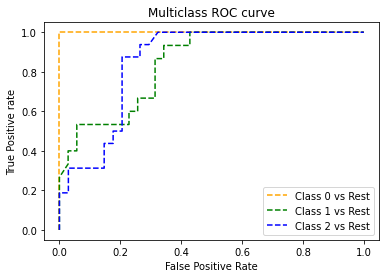

In [30]:
from sklearn.metrics import roc_curve

# roc curve for classes
fpr = {}
tpr = {}
thresh = {}

n_class = 3

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, predicted_probabilities[:,i], pos_label=i)

# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')  

In [31]:
# roc auc score with scikit-learn
from sklearn.metrics import roc_auc_score

print(roc_auc_score(y_test, predicted_probabilities, average='weighted', multi_class='ovr'))

0.9060924369747899


## Visualize Predictions and Decision Boundaries

**What are decision boundaries?**
 - In general, a pattern classifier carves up (or tesselates or partitions) the feature space into volumes called decision regions. 
 - All feature vectors in a decision region are assigned to the same category.

In [32]:
X_train.head()

,sepal width (cm),sepal length (cm)
96,2.9,5.7
105,3.0,7.6
66,3.0,5.6
0,3.5,5.1
122,2.8,7.7


In [33]:
# function to scatter plot the Iris train data
def plot_points(ax, X_train = X_train):
    for i, y_class in enumerate(set(y_train.values.flatten())):
        index = (y_train == y_class).values
        ax.scatter(
            X_train[index]['sepal width (cm)'],
            X_train[index]['sepal length (cm)'],
            c=colors[i],
            marker=markers[i],
            s=65, 
            edgecolor='w',
            label=names[i],
        )

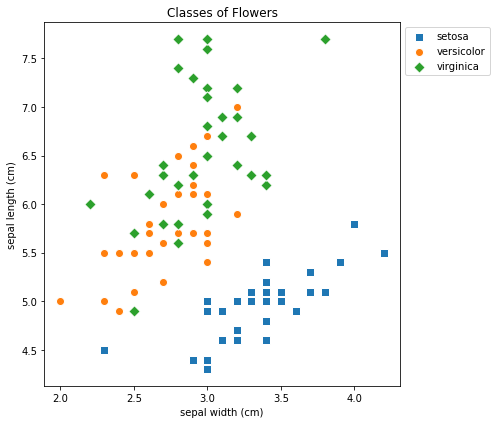

In [34]:
f, ax = plt.subplots(1, 1, figsize=(7, 6))

colors = ["tab:blue", "tab:orange","tab:green"]
markers = ["s", "o", "D"]
names = dataset.target_names

plot_points(ax)

ax.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
ax.set_title('Classes of Flowers')
ax.set_ylabel('sepal length (cm)')
ax.set_xlabel('sepal width (cm)')
plt.tight_layout()
plt.show()

### Plotting the decision boundary by using the following functions:

- **`np.meshgrid()`**

  - `meshgrid` returns coordinate matrices from coordinate vectors, effectively constructing a grid.
  - The documentation: https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html


- **`plt.contourf()`**

  - `contourf` draws filled contours.
  - The documentation: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contourf.html


#### What is meshgrid? A quick NumPy dive...

How does `meshgrid` work?

Creates two, 2D arrays of all the points in the grid: one for x coordinates, one for y coordinates

<img src="https://media.geeksforgeeks.org/wp-content/uploads/20190326203020/mesh04.png" alt="meshgrid example from geeksforgeeks">

We will go step-by-step to create a 2-by-4 grid below:

In [35]:
x_vector = np.linspace(-3, 3, 2)  # start, stop, num pts
y_vector = np.linspace(-2, 1, 4) 

print(f"x_vector: {x_vector} \t shape: {x_vector.shape}")
print(f"y_vector: {y_vector} \t shape: {y_vector.shape}")

x_vector: [-3.  3.] 	 shape: (2,)
y_vector: [-2. -1.  0.  1.] 	 shape: (4,)


In [36]:
# Return 2D x,y points of a grid
x_grid, y_grid = np.meshgrid(x_vector, y_vector)

print(f"x_grid, shape {x_grid.shape}:\n\n{x_grid}\n")
print(f"y_grid, shape {y_grid.shape}:\n\n{y_grid}")

x_grid, shape (4, 2):

[[-3.  3.]
 [-3.  3.]
 [-3.  3.]
 [-3.  3.]]

y_grid, shape (4, 2):

[[-2. -2.]
 [-1. -1.]
 [ 0.  0.]
 [ 1.  1.]]


If it's still not clear, read [What is the purpose of meshgrid in NumPy?](https://stackoverflow.com/questions/36013063/what-is-the-purpose-of-meshgrid-in-python-numpy)

**Additional `numpy` methods you will notice used in our decision boundary plots:**

- `np.ravel()`, which returns a contiguous flattened array.
- `np.stack()`, which concatenates a sequence of arrays along a new axis.

In [37]:
x_grid_ravel = x_grid.ravel()
y_grid_ravel = y_grid.ravel()

print(f"x_grid.ravel(), shape {x_grid_ravel.shape}:\n\n{x_grid_ravel}\n")
print(f"y_grid.ravel(), shape {y_grid_ravel.shape}:\n\n{y_grid_ravel}")

x_grid.ravel(), shape (8,):

[-3.  3. -3.  3. -3.  3. -3.  3.]

y_grid.ravel(), shape (8,):

[-2. -2. -1. -1.  0.  0.  1.  1.]


In [38]:
xy_grid_stacked = np.stack(
    (x_grid.ravel(), y_grid.ravel()),
    axis=1
) 

print(f"x and y stacked as columns in output:\n\n{xy_grid_stacked}\n")

xy_grid_stacked = np.stack(
    (x_grid.ravel(), y_grid.ravel()),
    axis=0
)

print(f"x and y stacked as rows in output:\n\n{xy_grid_stacked}")

x and y stacked as columns in output:

[[-3. -2.]
 [ 3. -2.]
 [-3. -1.]
 [ 3. -1.]
 [-3.  0.]
 [ 3.  0.]
 [-3.  1.]
 [ 3.  1.]]

x and y stacked as rows in output:

[[-3.  3. -3.  3. -3.  3. -3.  3.]
 [-2. -2. -1. -1.  0.  0.  1.  1.]]


**Now, with our `numpy` review over, let's get back to plotting our boundaries!**

- First, we will create a very fine (spacing of 0.003!) `np.meshgrid` of points to evaluate and color.

In [39]:
x_1 = X_train['sepal width (cm)']
x_2 = X_train['sepal length (cm)']

# Just for illustration purposes we use a margin of 0.2 to the
# left, right, top and bottom of our minimal and maximal points.
# This way our minimal and maximal points won't lie exactly 
# on the axis. 

x_1_min, x_1_max = x_1.min() - 0.2, x_1.max() + 0.2
x_2_min, x_2_max = x_2.min() - 0.2, x_2.max() + 0.2

xx_1, xx_2 = np.meshgrid(
    np.arange(x_1_min, x_1_max, 0.003),
    np.arange(x_2_min, x_2_max, 0.003),
)

- Then, we will generate predictions for each point in our grid and use `plt.contourf` to plot those results!

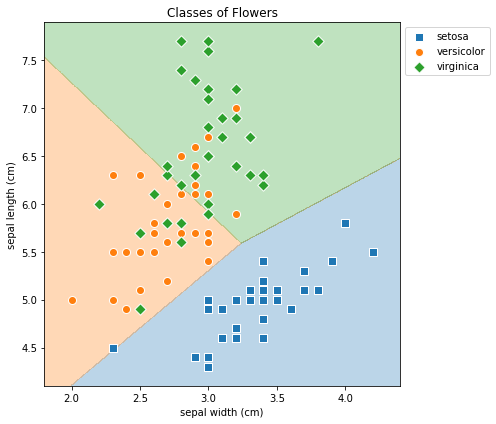

In [40]:
# Plotting decision regions
f, ax = plt.subplots(1, 1, figsize=(7, 6))

X_mesh = np.stack((xx_1.ravel(), xx_2.ravel()),axis=1)

X_mesh_df = pd.DataFrame(X_mesh, columns=X_train.columns)   # to remove the UserWarning: 
                                                            # X does not have valid feature names

Z = model_logistic.predict(X_mesh_df)
Z = Z.reshape(xx_1.shape)

# contourf(): Takes in x,y, and z values -- all 2D arrays of same size
ax.contourf(xx_1, xx_2, Z, alpha=0.3, colors=colors, levels=2)

plot_points(ax)
    
ax.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
ax.set_title('Classes of Flowers')
ax.set_ylabel('sepal length (cm)')
ax.set_xlabel('sepal width (cm)')

plt.tight_layout()
plt.show()

### Why are the decision boundaries of this Logistic Regression linear?

Imagine the simple case where we have only a 2-class (binary) classification problem: 

The logistic regression formula can be written as: 
$$
\hat{p} = \cfrac{e^{w^T x}}{1+e^{w^T x}}
$$

Dividing through by the numerator, This is equivalent to
$$
\hat{p} = \cfrac{1}{1+e^{-w^T x}}
$$

Expanding $w^T x$, we have $x_1$ (sepal width), $x_2$ (sepal length), and our intercept $x_0$ (constant = 1):

$$
w^T x = 
\begin{bmatrix}
w_0 & w_1 & w_2 \\
\end{bmatrix}
\begin{bmatrix}
x_0 \\ x_1 \\ x_2 
\end{bmatrix}
$$

Which makes our formula for $\hat{p}$ equivalent to:

$$
\hat{p} = \cfrac{1}{1 +e^{\displaystyle -(w_0 \cdot 1 + w_1  \cdot x_1 +  w_2 \cdot x_2)}}
$$

Since we don't use multiple higher order polynomial features like $x_1^2, x_2^2$, our logistic model only depends on the first order simple features $x_1$ and $x_2$. 

**What do we have to do to find the the decision boundary?**

The decision boundaries are exactly at the position where our algorithm "hesitates" when predicting which class to classify. The output probability of our sigmoid (or softmax) is exactly 0.5. Solving our sigmoid function for $p=0.5$:

$$
\begin{split}
0.5 &= \cfrac{1}{1 +e^{\displaystyle -(w_0 \cdot 1 + w_1 x_1 + w_2 x_2 )}} \\
0.5 &= \cfrac{1}{1 + 1} \\
e^{\displaystyle -(w_0 \cdot 1 + w_1  x_1 + w_2 x_2 )} &= 1 \\
& \\
-(w_0 \cdot 1 + w_1  x_1 + w_2 x_2 ) &= 0
\end{split}
$$

When we only use two predictor features this constraint of $p=0.5$ results in a linear system; thus we observe a **linear decision boundary.**

## Polynomial Logistic Regression

**In this part we will create degree-2 polynomial features for both of our predictors and re-fit our model and examine the results.**

In [41]:
X_train.head()

,sepal width (cm),sepal length (cm)
96,2.9,5.7
105,3.0,7.6
66,3.0,5.6
0,3.5,5.1
122,2.8,7.7


In [42]:
X_train_poly = X_train.copy()
X_train_poly['sepal width (cm)^2'] = X_train['sepal width (cm)']**2
X_train_poly['sepal length (cm)^2'] = X_train['sepal length (cm)']**2

X_test_poly = X_test.copy()
X_test_poly['sepal width (cm)^2'] = X_test_poly['sepal width (cm)']**2
X_test_poly['sepal length (cm)^2'] = X_test_poly['sepal length (cm)']**2
X_test_poly.head()

,sepal width (cm),sepal length (cm),sepal width (cm)^2,sepal length (cm)^2
73,2.8,6.1,7.84,37.21
18,3.8,5.7,14.44,32.49
118,2.6,7.7,6.76,59.29
78,2.9,6.0,8.41,36.00
76,2.8,6.8,7.84,46.24


In [43]:
# Training
model_logistic_poly = LogisticRegression(penalty="none", max_iter=200).fit(X_train_poly, y_train.to_numpy().ravel())

# Predict
y_pred_train = model_logistic_poly.predict(X_train_poly)
y_pred_test = model_logistic_poly.predict(X_test_poly)

# Performance Evaluation
train_score = accuracy_score(y_train, y_pred_train)*100
test_score = accuracy_score(y_test, y_pred_test)*100

print("Training Set Accuracy:",str(train_score)+'%')
print("Testing Set Accuracy:",str(test_score)+'%')

Training Set Accuracy: 81.0%
Testing Set Accuracy: 70.0%


If you get the `ConvergenceWarning: lbfgs failed to converge (status=1): STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.`, [read here.](https://stackoverflow.com/q/62658215)

Previously we got:

    Testing Set Accuracy: 82.0%

**Our test performance is decreasing, what might be happening?**
 - How would you test if this is happening? 
 - How would you inhibit this phenomenon from happening?

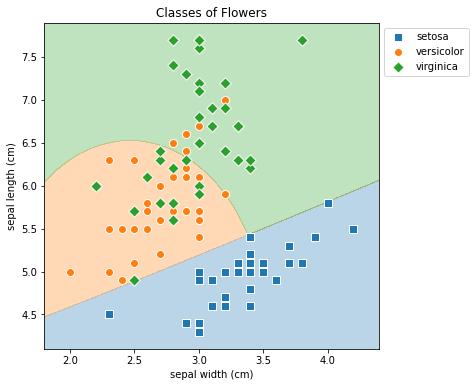

In [44]:
# Plotting decision regions
f, ax = plt.subplots(1, 1, figsize=(6, 6))

X_mesh_poly = np.stack(
    (xx_1.ravel(), xx_2.ravel(), xx_1.ravel()**2, xx_2.ravel()**2),
    axis=1,
)

X_mesh_poly_df = pd.DataFrame(X_mesh_poly, columns=X_train_poly.columns)     # to remove the UserWarning: 
                                                                             # X does not have valid feature names

Z = model_logistic_poly.predict(X_mesh_poly_df)
Z = Z.reshape(xx_1.shape)

ax.contourf(xx_1, xx_2, Z, alpha=0.3, colors=colors, levels=2)

plot_points(ax, X_train = X_train_poly)
    
ax.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
ax.set_title('Classes of Flowers')
ax.set_ylabel('sepal length (cm)')
ax.set_xlabel('sepal width (cm)')
    
plt.show()

<div class='exercise-r'>  

**What do you observe regarding the form of the decision boundaries? Does this make sense?**

</div>

### Decision boundaries for higher order logistic regression 

Let's return to the mathematical representation of our logistic regression model:

$$\hat{p}= \dfrac{e^{w^T x}}{1+e^{w^T x}}$$

Which is equivalent to: 

$$\hat{p}= \dfrac{1}{1+e^{-w^T x}}$$

Now we use $x_1$ (sepal width), $x_2$ (sepal length), an intercept $x_0$ (constant =1), PLUS two higher order terms while making predictions: 

- $x_1^2 = [\text{sepal width}]^2$

- $x_2^2 = [\text{sepal length}]^2$

$$\hat{p}= \cfrac{1}{1+e^{\displaystyle -(w_0 \cdot 1 + w_1 x_1 +  w_2 x_2 + w_3 x_1^2 +  w_4 x_2^2)}}$$

Now solving for $p=0.5$ results in an equation also dependent on $x_1^2$ and $x_2^2$: thus we observe **non-linear decision boundaries**:

$$
\begin{split}
0.5 &= \cfrac{1}{1 +e^{\displaystyle -(w_0 \cdot 1 + w_1 x_1 +  w_2 x_2 + w_3 x_1^2 +  w_4 x_2^2)}} \\
0.5 &= \cfrac{1}{1 + 1} \\
e^{\displaystyle -(w_0 \cdot 1 + w_1 x_1 +  w_2 x_2 + w_3 x_1^2 +  w_4 x_2^2)} &= 1 \\
& \\
-(w_0 \cdot 1 + w_1 x_1 +  w_2 x_2 + w_3 x_1^2 +  w_4 x_2^2) &= 0
\end{split}
$$

## Regularization

<div class='exercise-r'>  
    
**What do you expect to happen to our decision boundaries if we apply regularization to our polynomial regression model?**

</div>

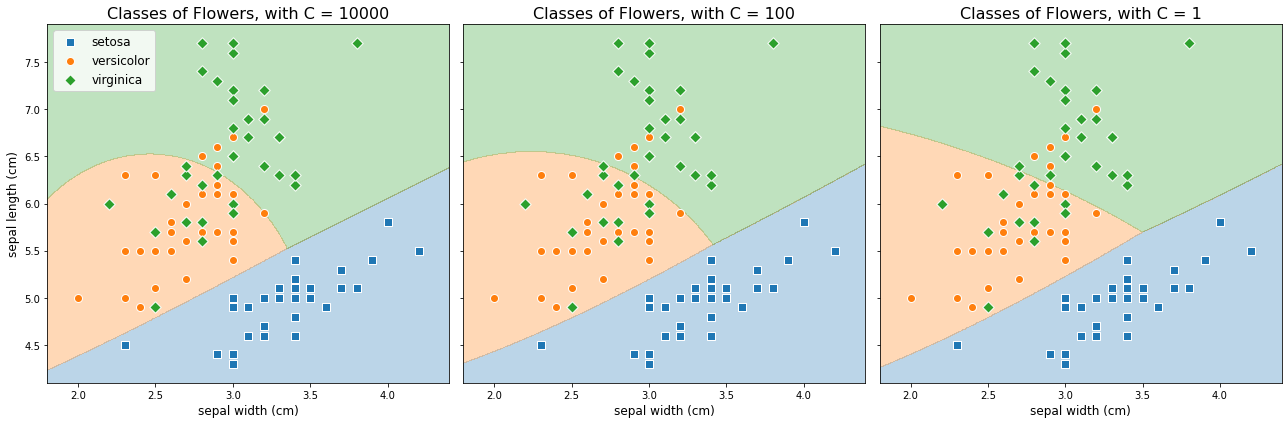

Wall time: 1.23 s


In [45]:
%%time

f, ax = plt.subplots(1, 3, sharey=True, figsize=(6*3, 6))

model_logistics = []
model_logistics_test_accs_scores = []
model_logistics_train_accs_scores = []

for test, C in enumerate([10000, 100, 1]):
    model_logistics.append(LogisticRegression(C=C, max_iter=400).fit(X_train_poly, y_train.to_numpy().ravel()))
    
    y_pred_train = model_logistics[test].predict(X_train_poly)
    y_pred_test = model_logistics[test].predict(X_test_poly)
    model_logistics_train_accs_scores.append(accuracy_score(y_train, y_pred_train)*100)
    model_logistics_test_accs_scores.append(accuracy_score(y_test, y_pred_test)*100)
   
    Z = model_logistics[test].predict(X_mesh_poly_df)
    Z = Z.reshape(xx_1.shape)

    ax[test].contourf(xx_1, xx_2, Z, alpha=0.3, colors=colors, levels=2)
    plot_points(ax[test])

    ax[test].set_title('Classes of Flowers, with C = '+ str(C), fontsize=16)
    ax[test].set_xlabel('sepal width (cm)', fontsize=12)
    
    if test==0:
        ax[test].legend(loc='upper left', ncol=1, fontsize=12)
        ax[test].set_ylabel('sepal length (cm)', fontsize=12)
    
plt.tight_layout()
plt.show()

**What do you observe?**

 - How are the decision boundaries looking?
 - What happens when the regularization term `C` changes? 
 - You may want to look at the documentation of `sklearn.linear.LogisticRegression()` to see how the `C` argument works:

In [46]:
# To get the documentation run the following command:

LogisticRegression?

**What do expect regarding the evolution of the norm of the coefficients of our models when the regularization term `C` changes?**

Our list contains all 3 models with different values for `C` (**take a look at the first parameter within brackets**)

In [47]:
model_logistics

[LogisticRegression(C=10000, max_iter=400),
 LogisticRegression(C=100, max_iter=400),
 LogisticRegression(C=1, max_iter=400)]

In [49]:
for test, model in enumerate(model_logistics):
    print('\nRegularization parameter: \tC = {}'.format(model.C))
    print("Training Set Accuracy: \t\t{}".format(model_logistics_train_accs_scores[test])+'%')
    print("Testing Set Accuracy: \t\t{}".format(model_logistics_test_accs_scores[test])+'%')
    print("Mean absolute coefficient: \t{:0.2f}".format(np.mean(np.abs(model.coef_))))


Regularization parameter: 	C = 10000
Training Set Accuracy: 		81.0%
Testing Set Accuracy: 		74.0%
Mean absolute coefficient: 	5.02

Regularization parameter: 	C = 100
Training Set Accuracy: 		82.0%
Testing Set Accuracy: 		78.0%
Mean absolute coefficient: 	1.61

Regularization parameter: 	C = 1
Training Set Accuracy: 		83.0%
Testing Set Accuracy: 		80.0%
Mean absolute coefficient: 	0.34


**Interpretation of the results: What happens when our regularization parameter decreases?**

The amount of regularization increases, and this results in:

- The **training** set accuracy is **increasing** a little bit (lower bias!)
- The **test** set accuracy is **increasing** (better generalization!)
- The size of our coefficents **decreases** on average

### 🔎 Have you noticed something strange?